# This project measures...

In [108]:
import pandas as pd 

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# Data Import

In [109]:
df = pd.read_csv("greenhouse.csv", index_col=0)
df.head()

country  year          value  \
0  Australia  2014  393126.946994   
1  Australia  2013  396913.936530   
2  Australia  2012  406462.847704   
3  Australia  2011  403705.528314   
4  Australia  2010  406200.993184   

                                            category     region directions  \
0  carbon_dioxide_co2_emissions_without_land_use_...  Australia      South   
1  carbon_dioxide_co2_emissions_without_land_use_...  Australia      South   
2  carbon_dioxide_co2_emissions_without_land_use_...  Australia      South   
3  carbon_dioxide_co2_emissions_without_land_use_...  Australia      South   
4  carbon_dioxide_co2_emissions_without_land_use_...  Australia      South   

   capitals official_language  
0  Canberra           English  
1  Canberra           English  
2  Canberra           English  
3  Canberra           English  
4  Canberra           English

# Creating columns

In [4]:
countries = {
    'Australia': 'Australia',
    'Austria': 'Europe',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Bulgaria': 'Europe',
    'Canada': 'North America',
    'Croatia': 'Europe',
    'Cyprus': 'Europe',
    'Czech Republic': 'Europe',
    'Denmark': 'Europe',
    'Estonia': 'Europe',
    'European Union': 'Europe',
    'Finland': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Greece': 'Europe',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Japan': 'Asia',
    'Latvia': 'Europe',
    'Liechtenstein': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Malta': 'Europe',
    'Monaco': 'Europe',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Norway': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Russian Federation': 'Europe',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Spain': 'Europe',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Turkey': 'Asia',
    'Ukraine': 'Europe',
    'United Kingdom': 'Europe',
    'United States of America': 'North America'
}

directions = {
    'Australia': 'South',
    'Austria': 'West',
    'Belarus': 'North East',
    'Belgium': 'North West',
    'Bulgaria': 'North',
    'Canada': 'North West',
    'Croatia': 'North',
    'Cyprus': 'South East',
    'Czech Republic': 'North',
    'Denmark': 'North',
    'Estonia': 'North East',
    'European Union': 'North West',
    'Finland': 'North East',
    'France': 'North West',
    'Germany': 'North West',
    'Greece': 'South East',
    'Hungary': 'North',
    'Iceland': 'North',
    'Ireland': 'North West',
    'Italy': 'South',
    'Japan': 'East',
    'Latvia': 'North East',
    'Liechtenstein': 'West',
    'Lithuania': 'North East',
    'Luxembourg': 'North West',
    'Malta': 'South',
    'Monaco': 'South West',
    'Netherlands': 'North West',
    'New Zealand': 'South East',
    'Norway': 'North',
    'Poland': 'North',
    'Portugal': 'South West',
    'Romania': 'North',
    'Russian Federation': 'North East',
    'Slovakia': 'North',
    'Slovenia': 'North',
    'Spain': 'South',
    'Sweden': 'North',
    'Switzerland': 'West',
    'Turkey': 'South',
    'Ukraine': 'North East',
    'United Kingdom': 'North West',
    'United States of America': 'West'
}


capitals = {
    'Australia': 'Canberra',
    'Austria': 'Vienna',
    'Belarus': 'Minsk',
    'Belgium': 'Brussels',
    'Bulgaria': 'Sofia',
    'Canada': 'Ottawa',
    'Croatia': 'Zagreb',
    'Cyprus': 'Nicosia',
    'Czech Republic': 'Prague',
    'Denmark': 'Copenhagen',
    'Estonia': 'Tallinn',
    'European Union': '',  # No specific capital as it is an organization
    'Finland': 'Helsinki',
    'France': 'Paris',
    'Germany': 'Berlin',
    'Greece': 'Athens',
    'Hungary': 'Budapest',
    'Iceland': 'Reykjavik',
    'Ireland': 'Dublin',
    'Italy': 'Rome',
    'Japan': 'Tokyo',
    'Latvia': 'Riga',
    'Liechtenstein': 'Vaduz',
    'Lithuania': 'Vilnius',
    'Luxembourg': 'Luxembourg City',
    'Malta': 'Valletta',
    'Monaco': 'Monaco',
    'Netherlands': 'Amsterdam',
    'New Zealand': 'Wellington',
    'Norway': 'Oslo',
    'Poland': 'Warsaw',
    'Portugal': 'Lisbon',
    'Romania': 'Bucharest',
    'Russian Federation': 'Moscow',
    'Slovakia': 'Bratislava',
    'Slovenia': 'Ljubljana',
    'Spain': 'Madrid',
    'Sweden': 'Stockholm',
    'Switzerland': 'Bern',
    'Turkey': 'Ankara',
    'Ukraine': 'Kyiv',
    'United Kingdom': 'London',
    'United States of America': 'Washington, D.C.'
}

languages = {
    'Australia': 'English',
    'Austria': 'German',
    'Belarus': 'Belarusian and Russian',
    'Belgium': 'Dutch, French, and German',
    'Bulgaria': 'Bulgarian',
    'Canada': 'English and French',
    'Croatia': 'Croatian',
    'Cyprus': 'Greek and Turkish',
    'Czech Republic': 'Czech',
    'Denmark': 'Danish',
    'Estonia': 'Estonian',
    'European Union': '',  # No specific national language as it is an organization
    'Finland': 'Finnish and Swedish',
    'France': 'French',
    'Germany': 'German',
    'Greece': 'Greek',
    'Hungary': 'Hungarian',
    'Iceland': 'Icelandic',
    'Ireland': 'Irish and English',
    'Italy': 'Italian',
    'Japan': 'Japanese',
    'Latvia': 'Latvian',
    'Liechtenstein': 'German',
    'Lithuania': 'Lithuanian',
    'Luxembourg': 'Luxembourgish, French, and German',
    'Malta': 'Maltese and English',
    'Monaco': 'French',
    'Netherlands': 'Dutch',
    'New Zealand': 'English, Māori, and New Zealand Sign Language',
    'Norway': 'Norwegian',
    'Poland': 'Polish',
    'Portugal': 'Portuguese',
    'Romania': 'Romanian',
    'Russian Federation': 'Russian',
    'Slovakia': 'Slovak',
    'Slovenia': 'Slovene',
    'Spain': 'Spanish',
    'Sweden': 'Swedish',
    'Switzerland': 'German, French, Italian, and Romansh',
    'Turkey': 'Turkish',
    'Ukraine': 'Ukrainian',
    'United Kingdom': 'English',
    'United States of America': 'English'
}

df["region"] = [countries[i] for i in df.country]
df["directions"] = [directions[i] for i in df.country]
df["capitals"] = [capitals[i] for i in df.country]
df["official_language"] = [languages[i] for i in df.country]





In [110]:
df.head()

country  year          value  \
0  Australia  2014  393126.946994   
1  Australia  2013  396913.936530   
2  Australia  2012  406462.847704   
3  Australia  2011  403705.528314   
4  Australia  2010  406200.993184   

                                            category     region directions  \
0  carbon_dioxide_co2_emissions_without_land_use_...  Australia      South   
1  carbon_dioxide_co2_emissions_without_land_use_...  Australia      South   
2  carbon_dioxide_co2_emissions_without_land_use_...  Australia      South   
3  carbon_dioxide_co2_emissions_without_land_use_...  Australia      South   
4  carbon_dioxide_co2_emissions_without_land_use_...  Australia      South   

   capitals official_language  
0  Canberra           English  
1  Canberra           English  
2  Canberra           English  
3  Canberra           English  
4  Canberra           English

In [8]:
sns.set()

# Exploratory Data Analysis

In [9]:
df.head()

country  year          value  \
0  Australia  2014  393126.946994   
1  Australia  2013  396913.936530   
2  Australia  2012  406462.847704   
3  Australia  2011  403705.528314   
4  Australia  2010  406200.993184   

                                            category     region directions  \
0  carbon_dioxide_co2_emissions_without_land_use_...  Australia      South   
1  carbon_dioxide_co2_emissions_without_land_use_...  Australia      South   
2  carbon_dioxide_co2_emissions_without_land_use_...  Australia      South   
3  carbon_dioxide_co2_emissions_without_land_use_...  Australia      South   
4  carbon_dioxide_co2_emissions_without_land_use_...  Australia      South   

   capitals official_language  
0  Canberra           English  
1  Canberra           English  
2  Canberra           English  
3  Canberra           English  
4  Canberra           English

<Axes: xlabel='year', ylabel='value'>

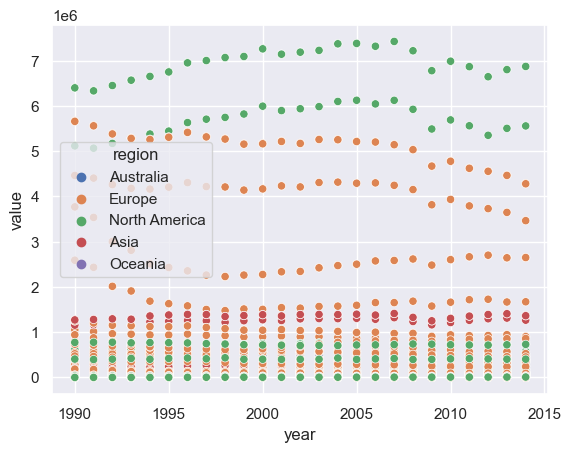

In [10]:
sns.scatterplot(x="year", y="value", hue="region", data=df)

In [11]:
plt.figure(figsize=(100,100))
sns.countplot(y="country", hue="region", data=df)

plt.show()

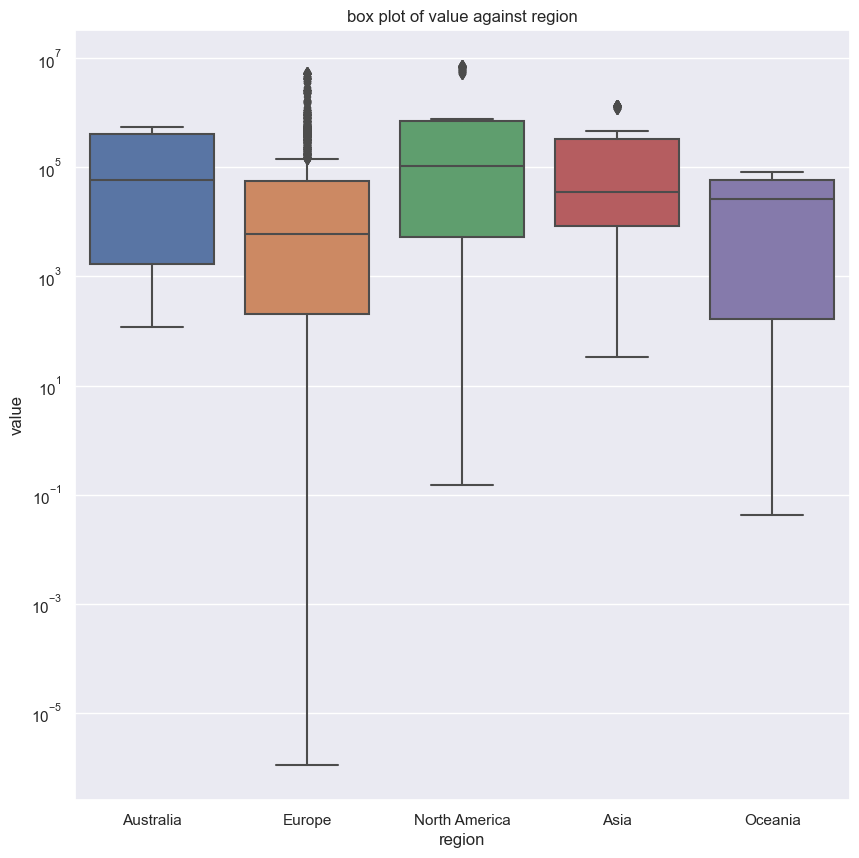

In [12]:
plt.figure(figsize=(10,10))
sns.boxplot(x="region", y="value", data=df)

plt.yscale("log")
plt.title("box plot of value against region")
plt.show()

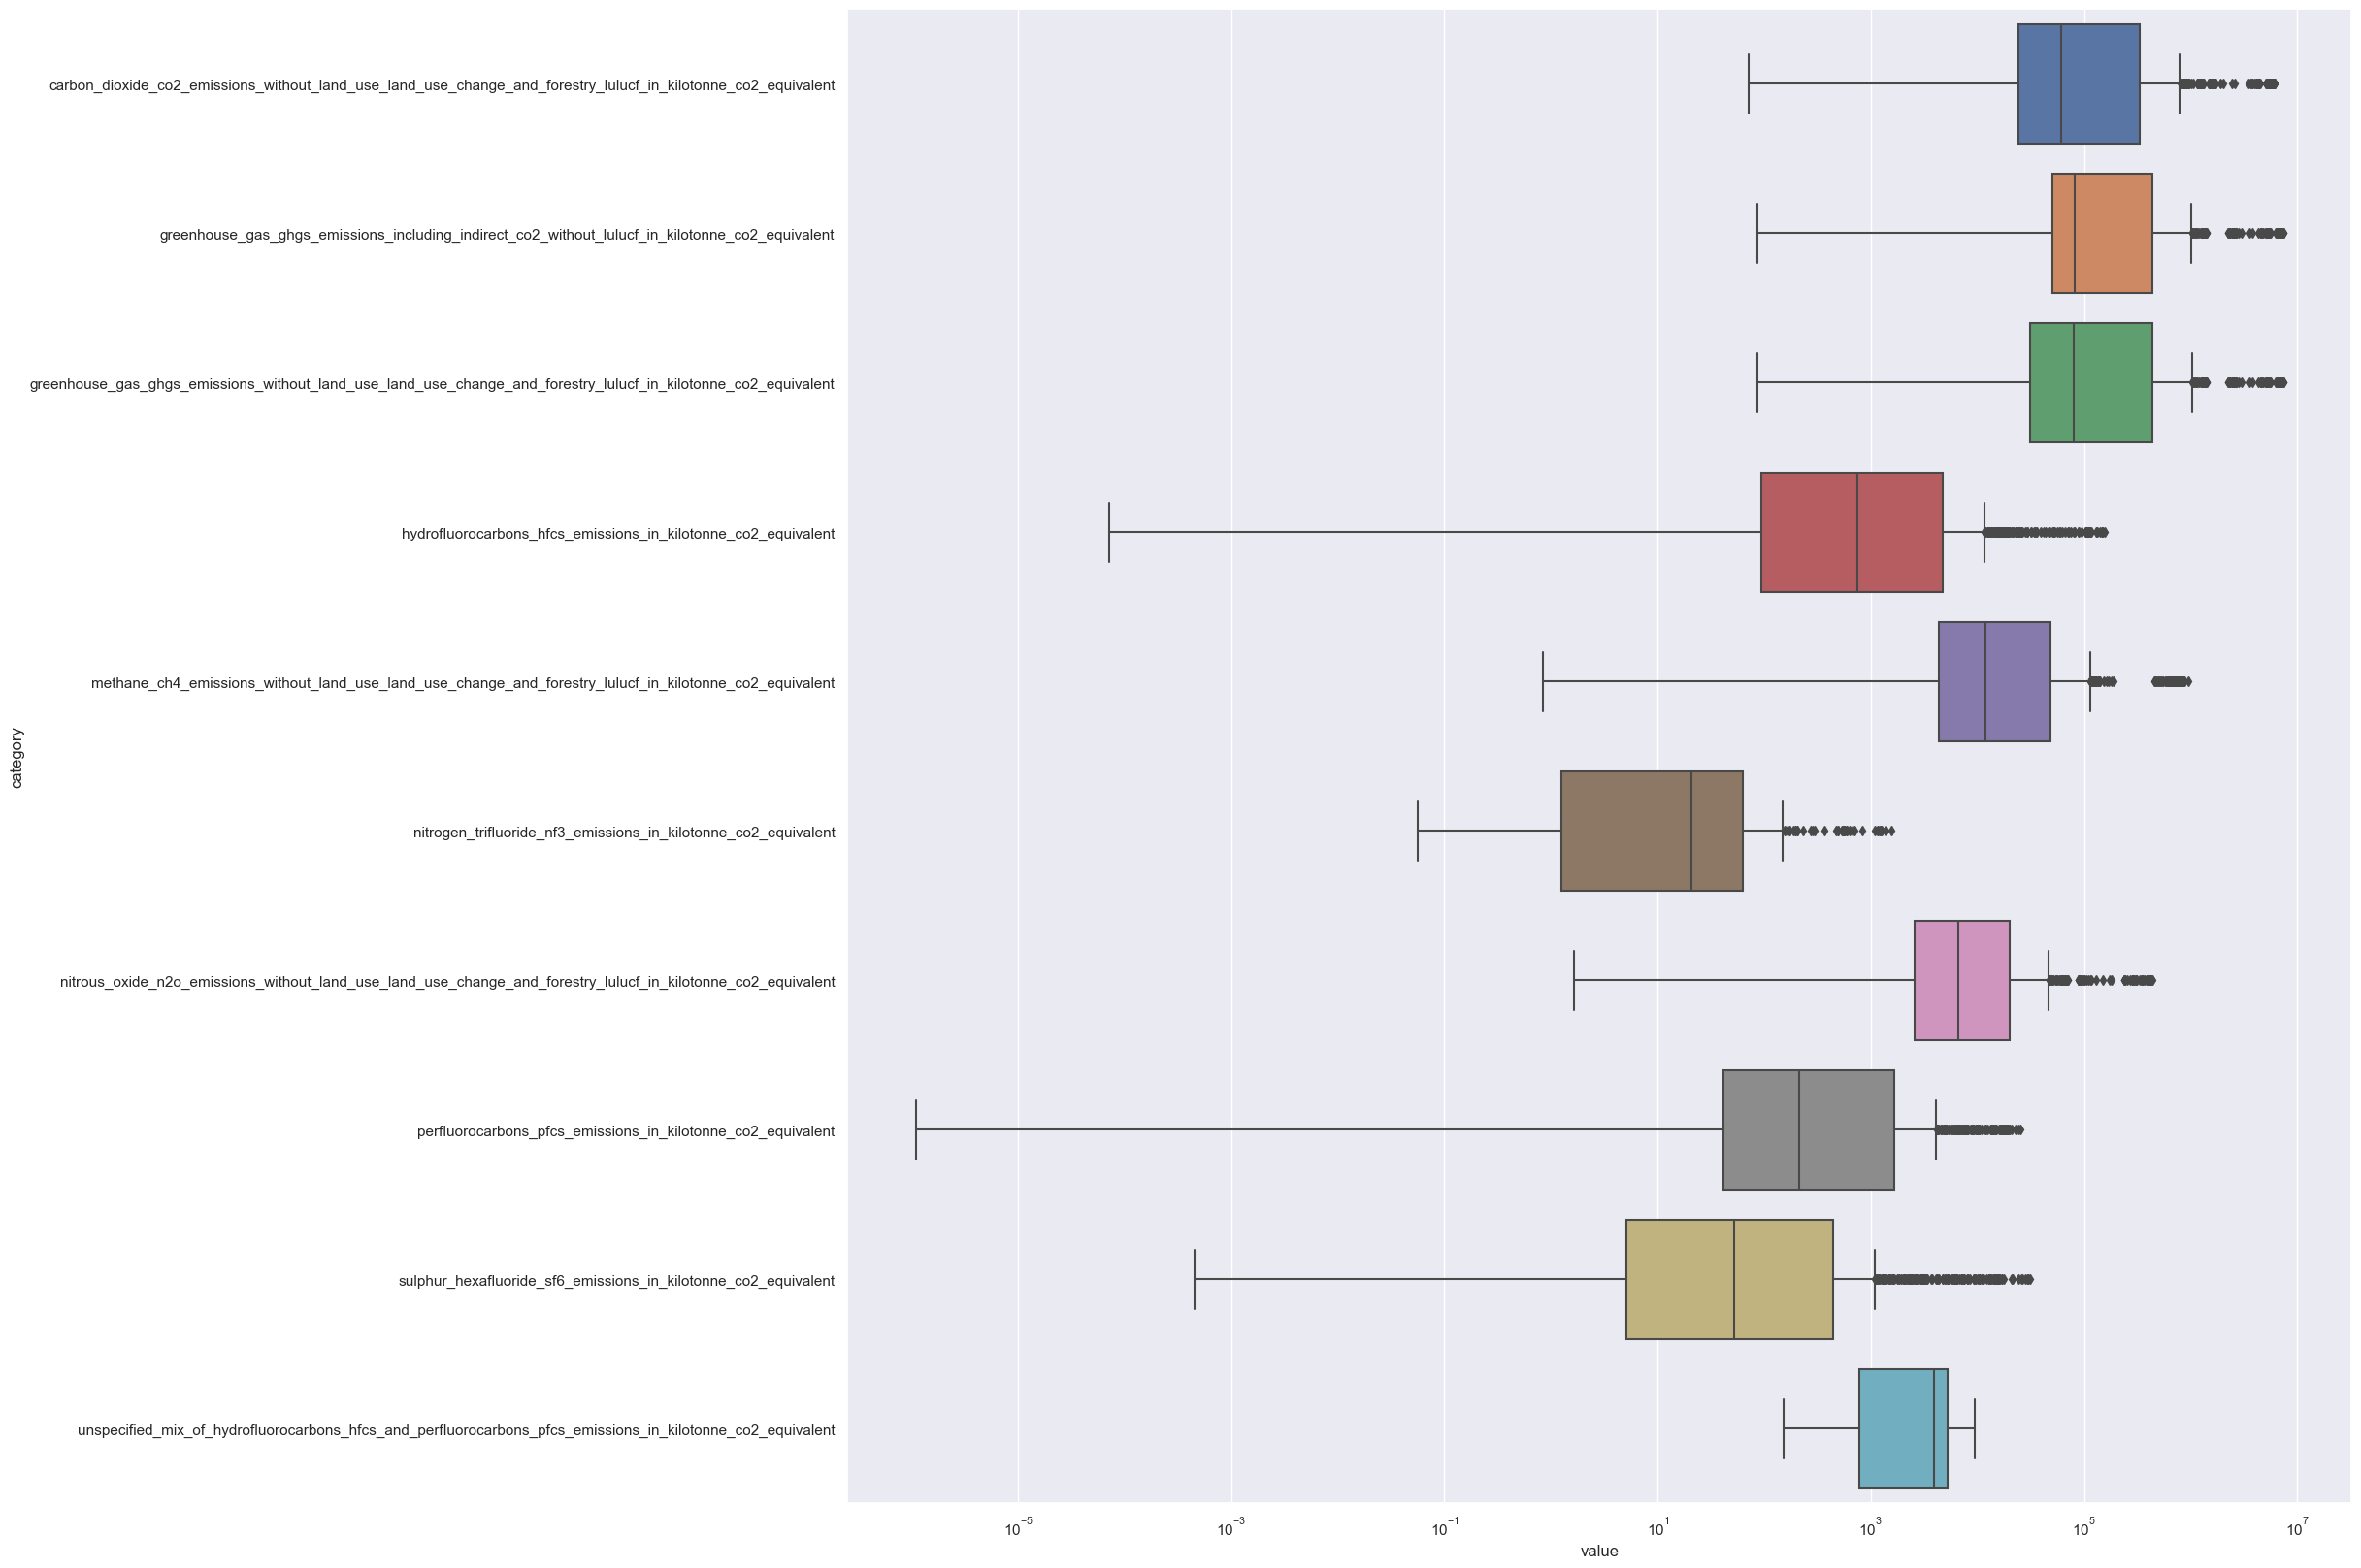

In [13]:
plt.figure(figsize=(20,20))
sns.boxplot(y="category", x="value", data=df)
plt.xscale("log")
plt.show()

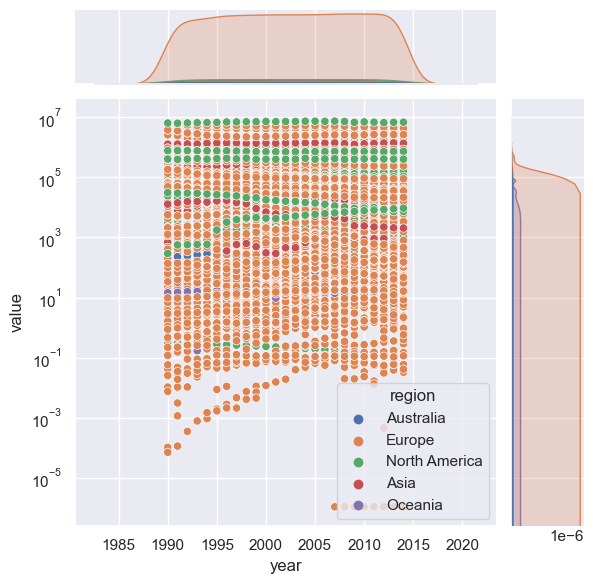

In [14]:
sns.jointplot(x="year", y="value", data=df, hue="region")
plt.yscale("log")
plt.show()

In [15]:
ols("value ~ category", data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     94.19
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          4.23e-168
Time:                        23:04:52   Log-Likelihood:            -1.2582e+05
No. Observations:                8406   AIC:                         2.517e+05
Df Residuals:                    8396   BIC:                         2.517e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================================================================================
                                                                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                                    4.32e+05   2.34e+04     18.465      0.000    3.86e+05    4.78e+05
category[T.greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent]                 1.554e+05   3.42e+04      4.548      0.000    8.84e+04    2.22e+05
category[T.greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent]  1.128e+05   3.31e+04      3.409      0.001     4.8e+04    1.78e+05
category[T.hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent]                                                  -4.246e+05   3.39e+04    -12.518      0.000   -4.91e+05   -3.58e+05
category[T.methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent]         -3.587e+05   3.31e+04    -10.842      0.000   -4.24e+05   -2.94e+05
category[T.nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent]                                                 -4.319e+05    5.4e+04     -7.996      0.000   -5.38e+05   -3.26e+05
category[T.nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent]   -4.021e+05   3.31e+04    -12.153      0.000   -4.67e+05   -3.37e+05
category[T.perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent]                                                    -4.302e+05   3.54e+04    -12.144      0.000      -5e+05   -3.61e+05
category[T.sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent]                                                 -4.308e+05   3.34e+04    -12.890      0.000   -4.96e+05   -3.65e+05
category[T.unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent]     -4.288e+05   9.16e+04     -4.682      0.000   -6.08e+05   -2.49e+05
==============================================================================
Omnibus:                     9555.714   Durbin-Watson:                   0.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           678572.325
Skew:                           6.110   Prob(JB):                         0.00
Kurtosis:                      45.286   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
ols("value ~ region", data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     224.2
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          3.87e-183
Time:                        23:04:52   Log-Likelihood:            -1.2580e+05
No. Observations:                8406   AIC:                         2.516e+05
Df Residuals:                    8401   BIC:                         2.516e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                3.145e+05   3.83e+04      8.216      0.000    2.39e+05    3.89e+05
region[T.Australia]     -1.323e+05   6.62e+04     -1.997      0.046   -2.62e+05   -2422.831
region[T.Europe]        -1.763e+05   3.93e+04     -4.482      0.000   -2.53e+05   -9.92e+04
region[T.North America]  8.993e+05    5.2e+04     17.304      0.000    7.97e+05       1e+06
region[T.Oceania]       -2.856e+05   6.65e+04     -4.297      0.000   -4.16e+05   -1.55e+05
==============================================================================
Omnibus:                     8737.052   Durbin-Watson:                   0.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           442829.706
Skew:                           5.360   Prob(JB):                         0.00
Kurtosis:                      36.903   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 1000x1000 with 0 Axes>

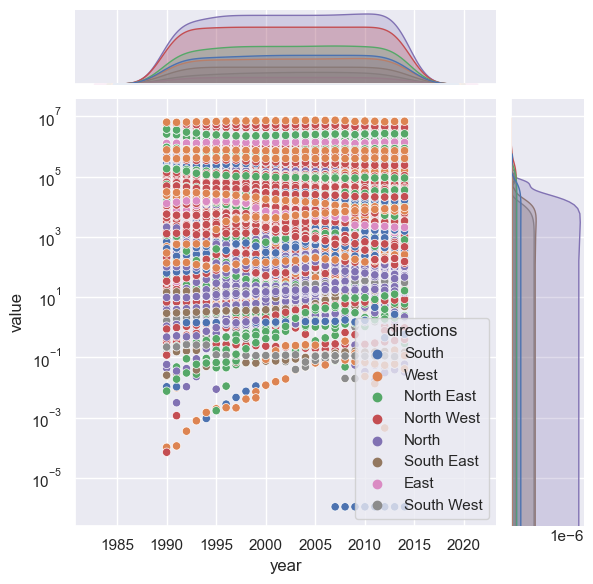

In [17]:
plt.figure(figsize=(10,10))

sns.jointplot(x="year", y="value", data=df, hue="directions")
plt.yscale("log")

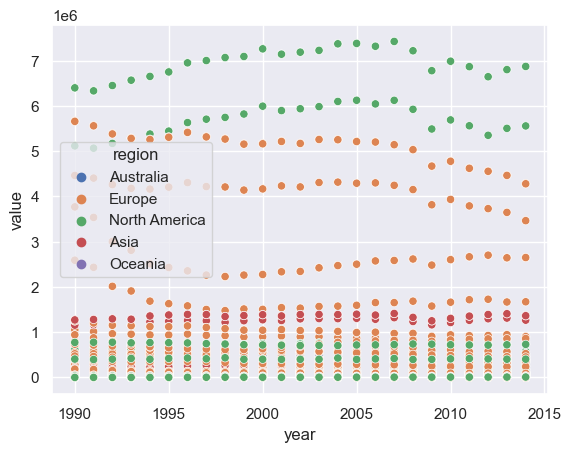

<Figure size 10000x10000 with 0 Axes>

In [18]:
sns.scatterplot(x="year", y="value", hue="region", data=df)
plt.figure(figsize=(100,100))
plt.show()

In [19]:
df.country.unique()

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'European Union', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russian Federation', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
       'United States of America'], dtype=object)

In [20]:
df.head()


country  year          value  \
0  Australia  2014  393126.946994   
1  Australia  2013  396913.936530   
2  Australia  2012  406462.847704   
3  Australia  2011  403705.528314   
4  Australia  2010  406200.993184   

                                            category     region directions  \
0  carbon_dioxide_co2_emissions_without_land_use_...  Australia      South   
1  carbon_dioxide_co2_emissions_without_land_use_...  Australia      South   
2  carbon_dioxide_co2_emissions_without_land_use_...  Australia      South   
3  carbon_dioxide_co2_emissions_without_land_use_...  Australia      South   
4  carbon_dioxide_co2_emissions_without_land_use_...  Australia      South   

   capitals official_language  
0  Canberra           English  
1  Canberra           English  
2  Canberra           English  
3  Canberra           English  
4  Canberra           English

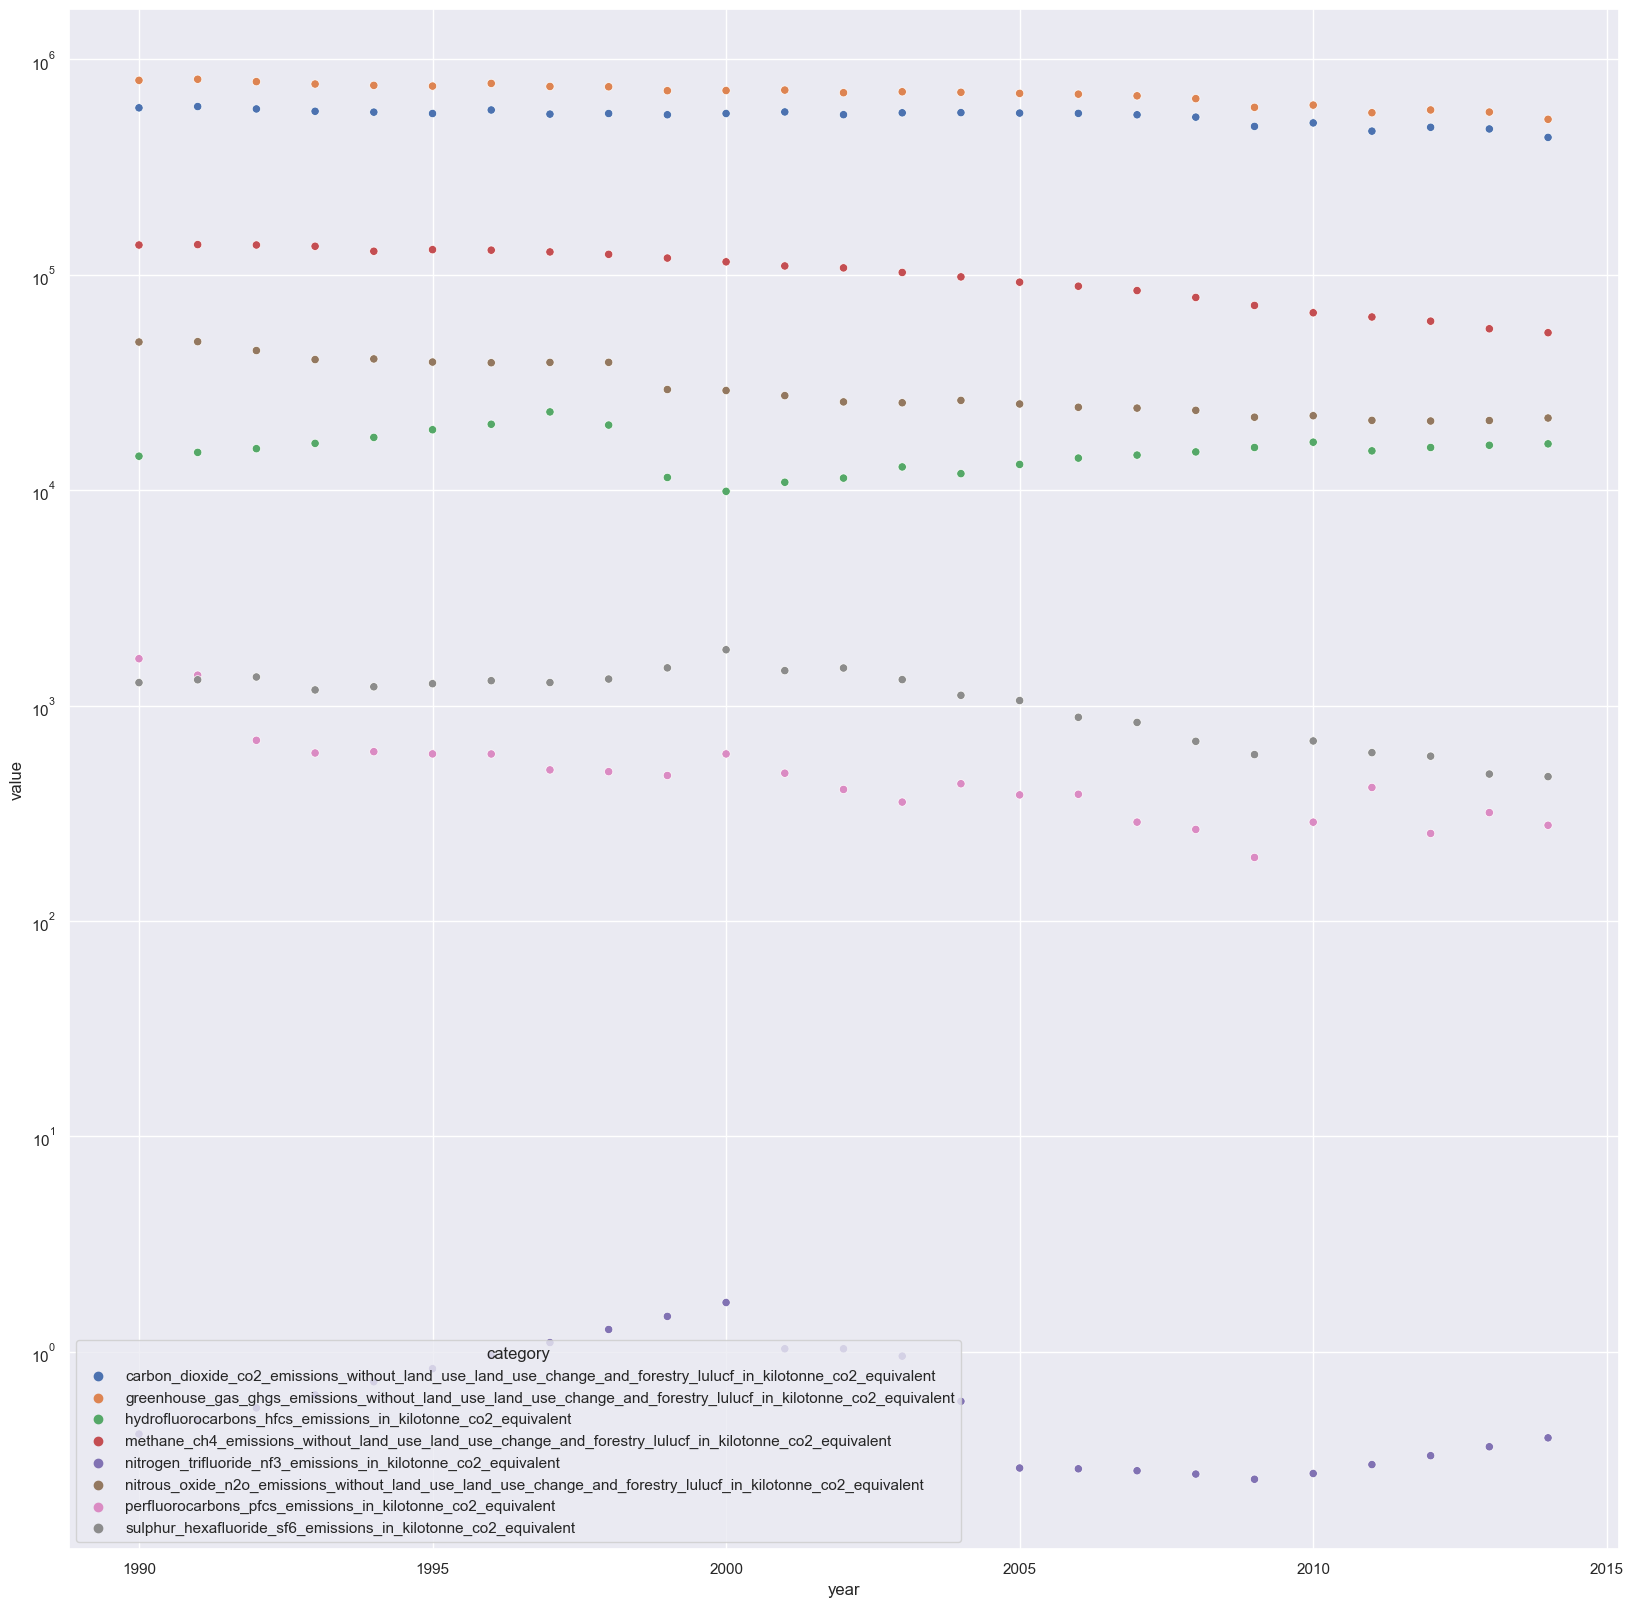

In [118]:
%matplotlib inline
plt.figure(figsize=(20,20))
sns.scatterplot(x="year", y="value", data=df[df.country == "United Kingdom"],
                hue="category")
plt.yscale("log")
plt.show()

# Network of countries to region 

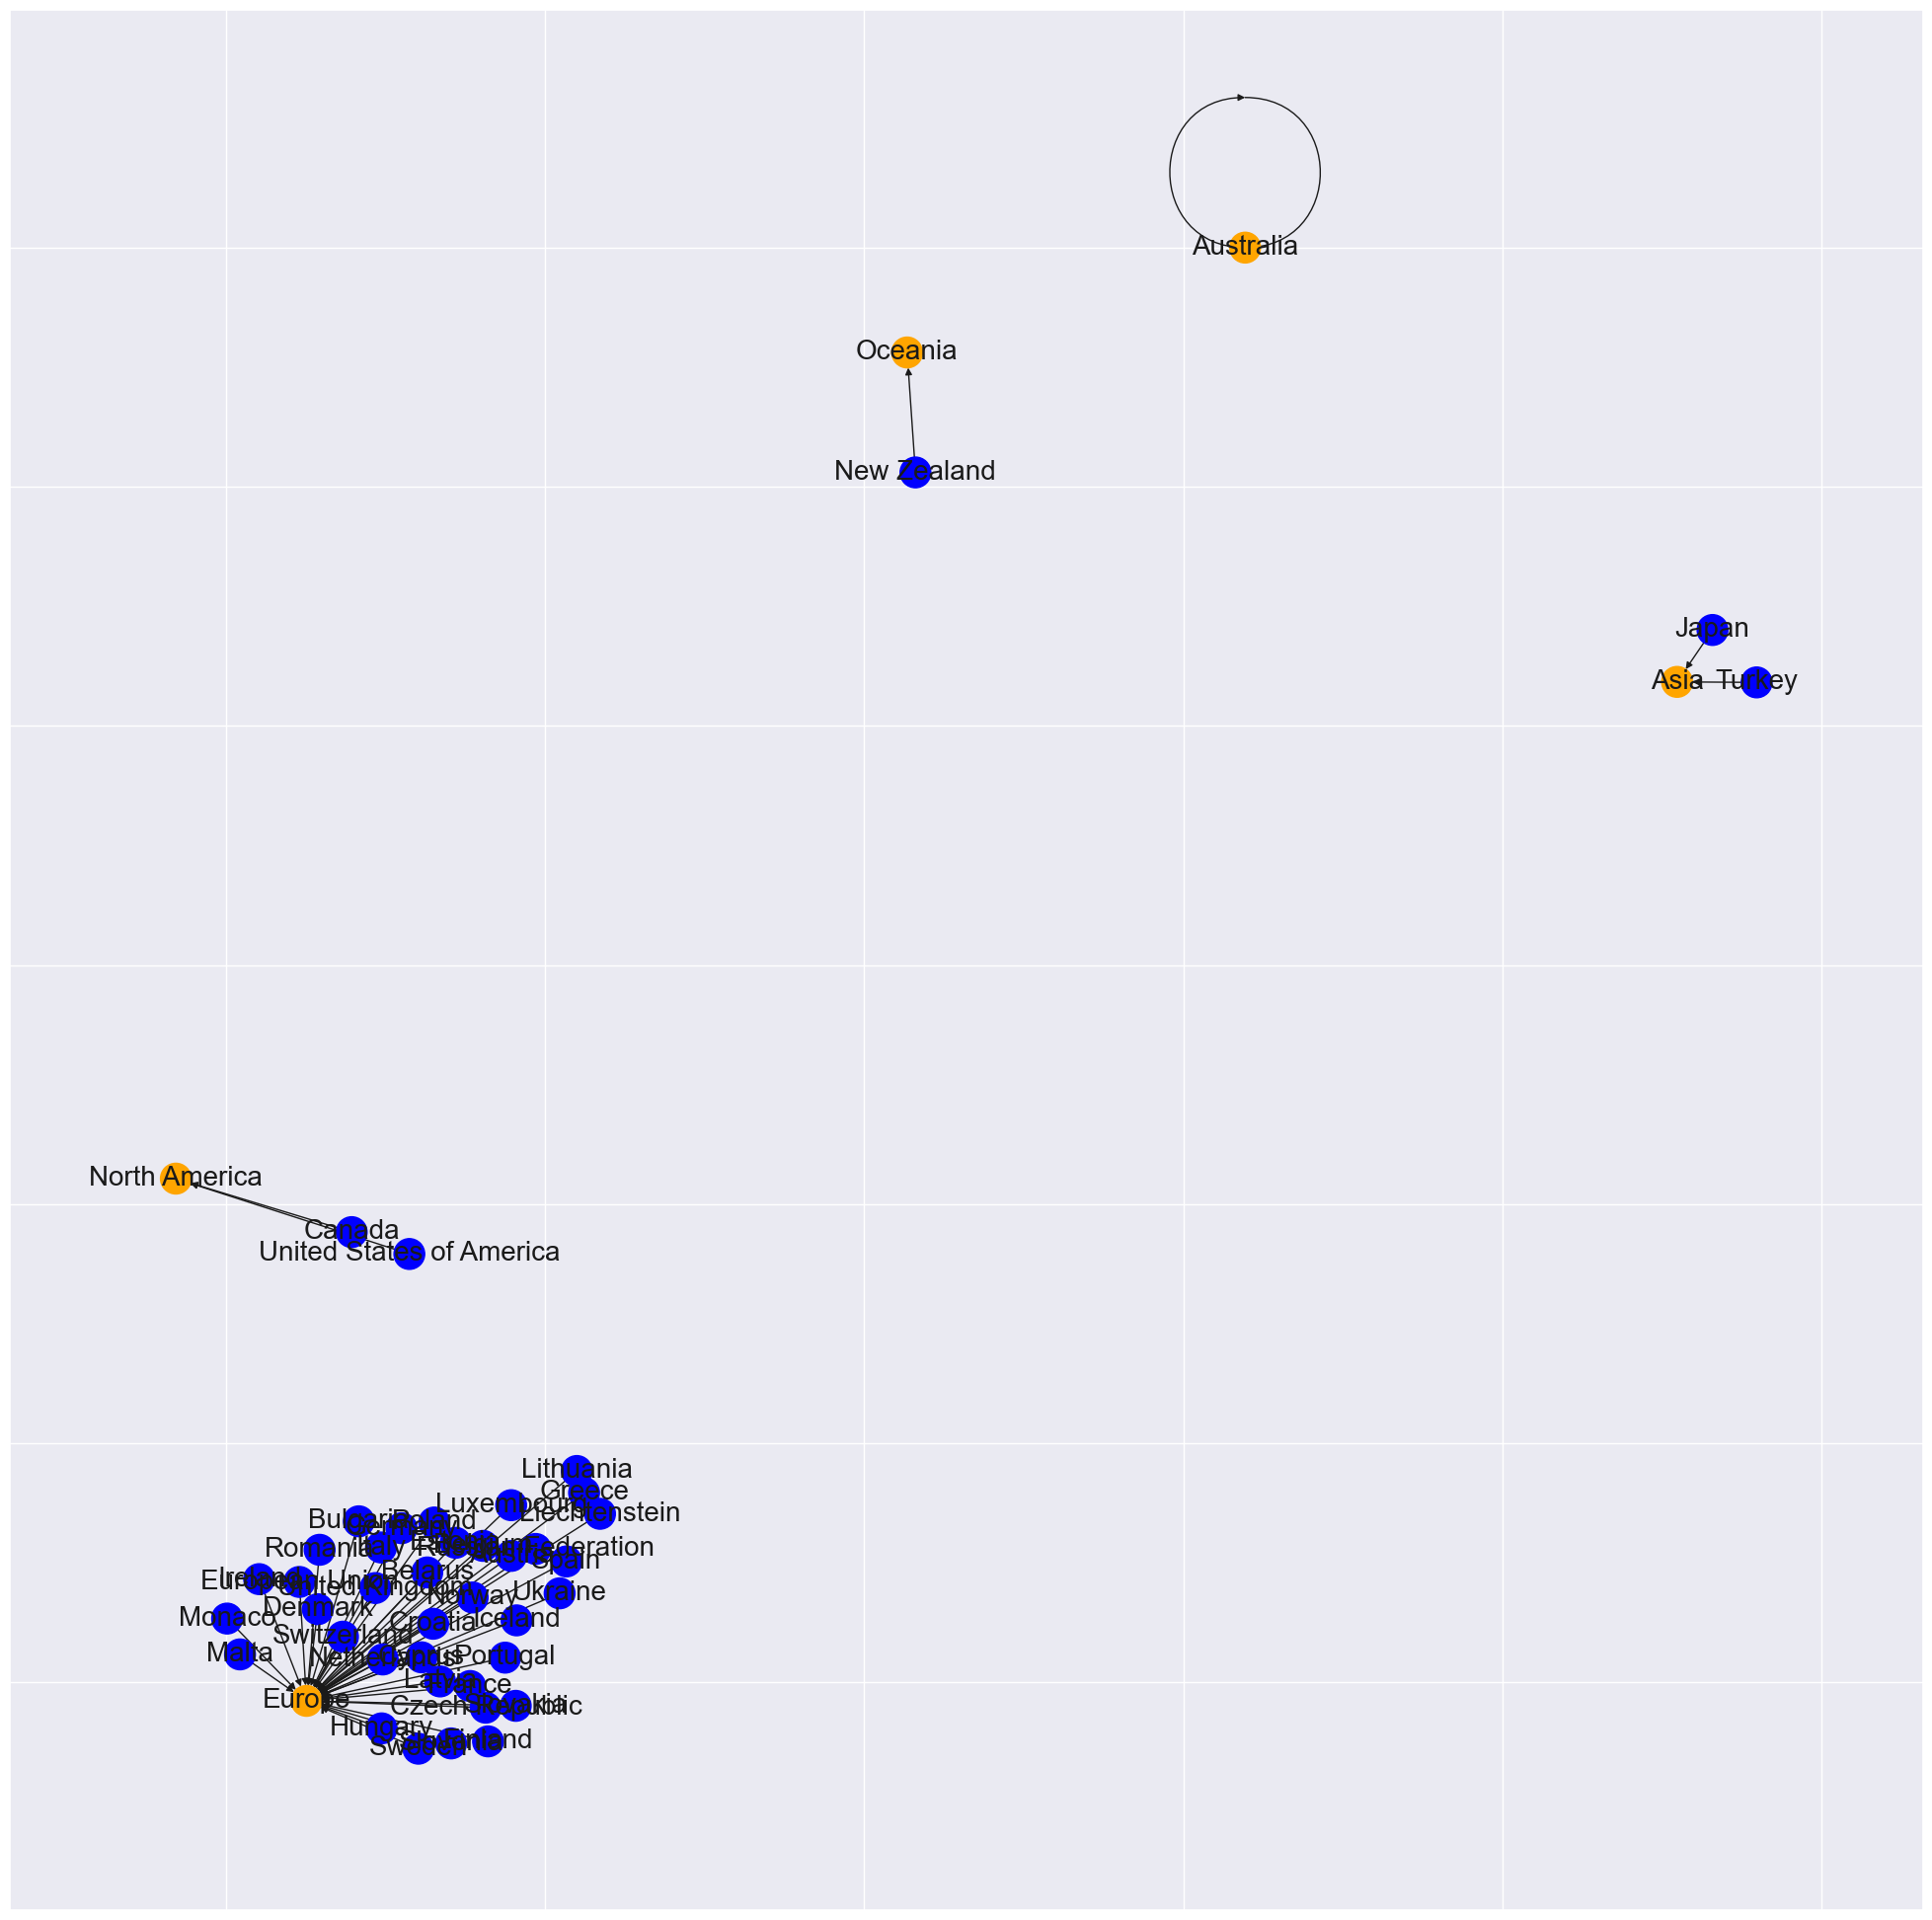

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
# Create a directed graph
G = nx.DiGraph()

# Define edges from the DataFrame
edges = [(df.iloc[i].country, df.iloc[i].region) for i in range(len(df))]

## Can vary length according to 
G.add_edges_from(edges, length=100)

# Initialize a dictionary to store node colors
node_colors = {}

# Set orange color for nodes representing regions
regions = set(df['region'])  # Assuming 'region' is a column in your DataFrame
for region in regions:
    node_colors[region] = 'orange'

# Set node colors based on the 'color' attribute
nx.set_node_attributes(G, node_colors, 'color')

# Calculate pagerank
ppr1 = nx.pagerank(G)

# Plot the graph with node colors
plt.figure(figsize=(25, 25))
pos = nx.spring_layout(G, seed=42)  # You can choose a layout algorithm that suits your graph
node_colors = [node_colors.get(node, 'blue') for node in G.nodes()]  # Default to blue for non-region nodes
nx.draw_networkx(G, pos, with_labels=True, node_size=500, node_color=node_colors, font_size=20)
plt.show()


In [22]:
node_colors

['orange',
 'blue',
 'orange',
 'blue',
 'blue',
 'blue',
 'blue',
 'orange',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'orange',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'orange',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue']

In [23]:
print (len(df.official_language.unique()))
print (len(df.region.unique()))

38
5


## Plotting language to region 

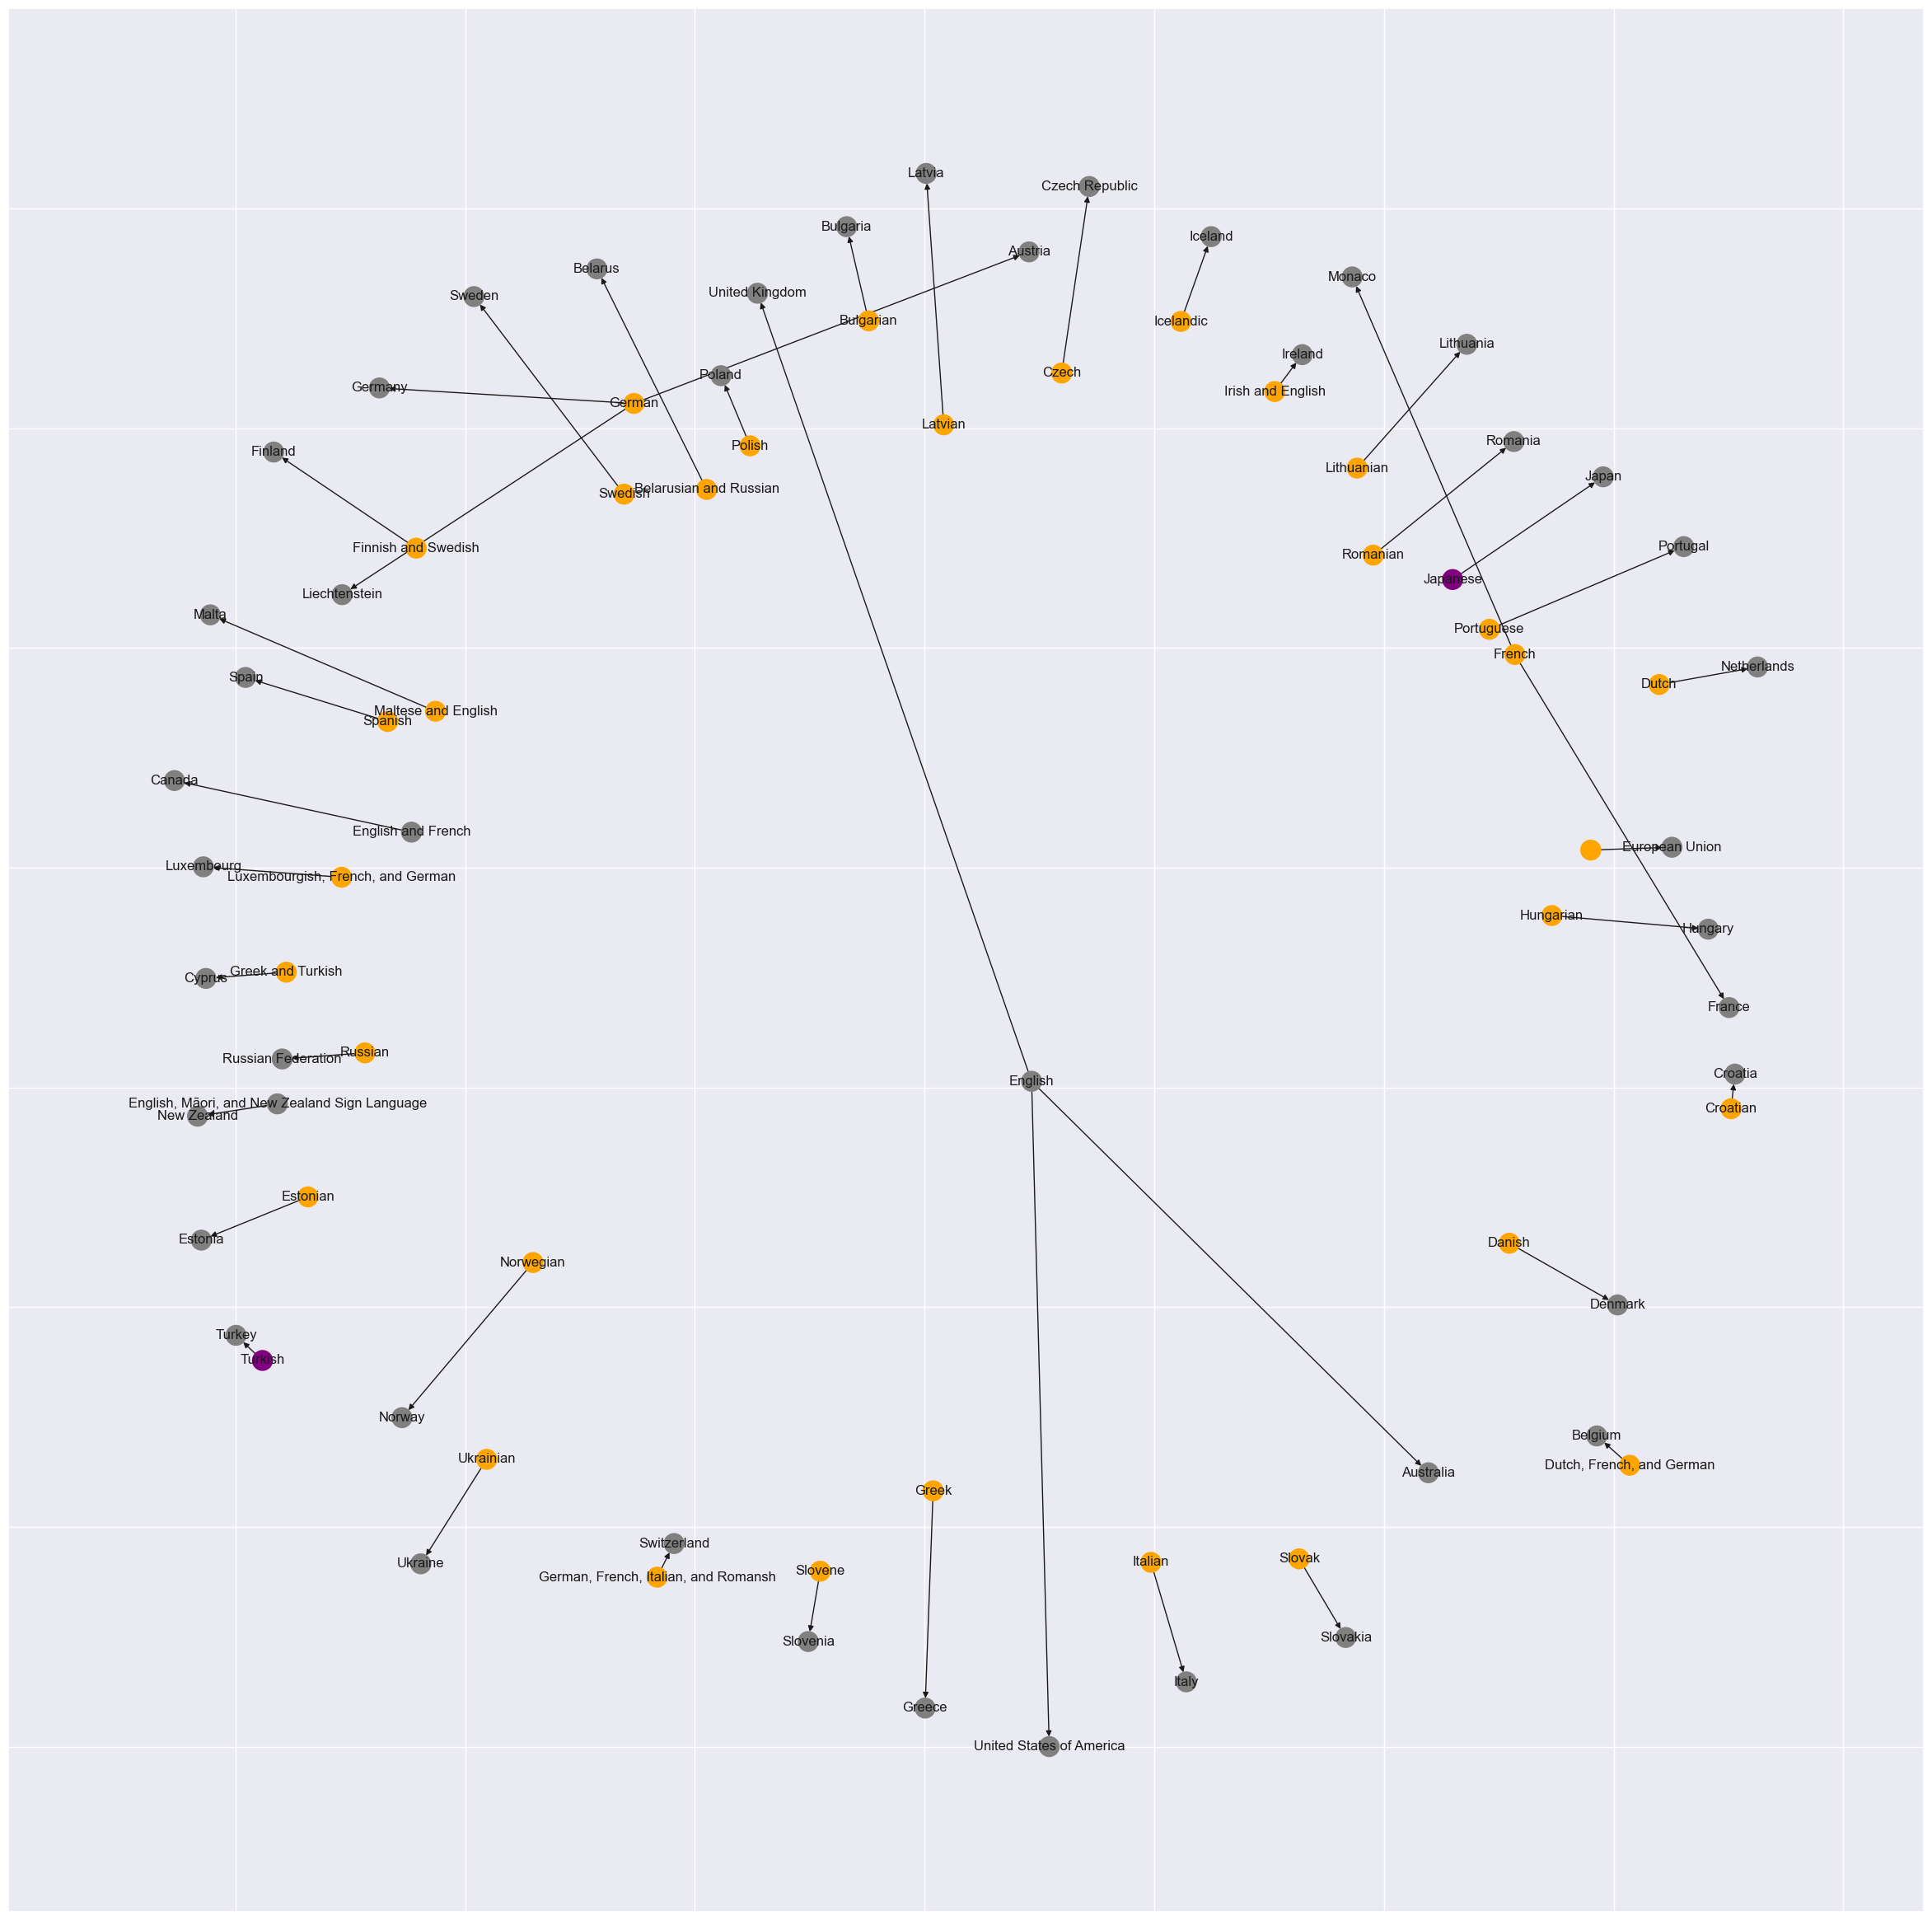

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
# Create a directed graph
z = nx.DiGraph()

# Define edges from the DataFrame
edges2 = [(df.iloc[i].official_language, df.iloc[i].country) for i in range(len(df))]
z.add_edges_from(edges2)

# Define a color mapping for regions
region_colors = {'Europe': 'orange', 'Asia': 'purple', 'Africa': 'yellow'}  # Add more regions as needed

# Create a dictionary to store node colors based on regions
node_colors = {}

# Assign colors based on the 'region' column
for i in range(len(df)):
    official_language = df.iloc[i].official_language
    region = df.iloc[i].region
    
    # Node colors based on region
    node_colors[official_language] = region_colors.get(region, 'gray')  # Default to gray for unknown regions

# Plot the graph with node colors
plt.figure(figsize=(30, 30))
nx.draw_networkx(
    z, 
    with_labels=True,
    node_color=[node_colors.get(node, 'gray') for node in z.nodes()],
)

plt.show()


# Preprocessing

In [25]:
df.head()

country  year          value  \
0  Australia  2014  393126.946994   
1  Australia  2013  396913.936530   
2  Australia  2012  406462.847704   
3  Australia  2011  403705.528314   
4  Australia  2010  406200.993184   

                                            category     region directions  \
0  carbon_dioxide_co2_emissions_without_land_use_...  Australia      South   
1  carbon_dioxide_co2_emissions_without_land_use_...  Australia      South   
2  carbon_dioxide_co2_emissions_without_land_use_...  Australia      South   
3  carbon_dioxide_co2_emissions_without_land_use_...  Australia      South   
4  carbon_dioxide_co2_emissions_without_land_use_...  Australia      South   

   capitals official_language  
0  Canberra           English  
1  Canberra           English  
2  Canberra           English  
3  Canberra           English  
4  Canberra           English

<Axes: xlabel='count', ylabel='country'>

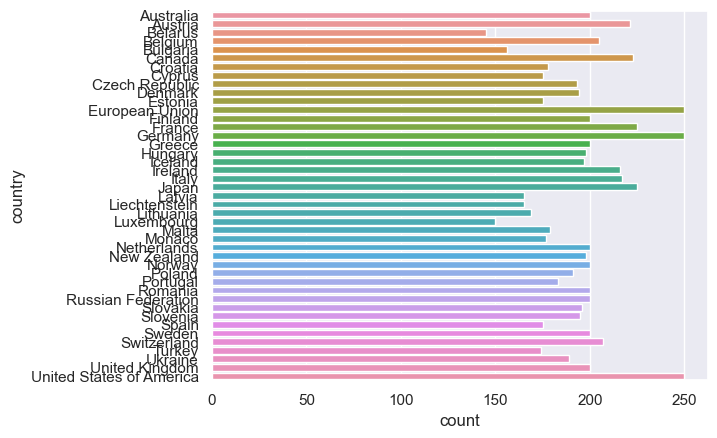

In [26]:
sns.countplot(y="country", data=df)

In [61]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from category_encoders import TargetEncoder
from category_encoders import WOEEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from category_encoders.cat_boost import CatBoostEncoder

# Create your data frame or load your data
# Assuming you have a DataFrame called "df"

woe = WOEEncoder()
te = TargetEncoder()
le = LabelEncoder()

# Encode the categorical variables
X = df.drop(["country", "capitals"], axis=1)
df["country"] = le.fit_transform(df["country"])
y = df.country.values.reshape(-1, 1)

# Use TargetEncoder to encode X
X = te.fit_transform(X, df["country"])

# Oversample the data
over_sampler = RandomOverSampler()
under_sampler = RandomUnderSampler()
X, y = under_sampler.fit_resample(X, y)


AttributeError: 'list' object has no attribute 'drop'

# New ModeL

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y)

clf = RandomForestClassifier(random_state=42, max_depth=7)
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)



## Improved accuracy





# Metrics

In [29]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score 
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score

In [30]:
## Training accuracy

train_pred = clf.predict(X_train)
print (f"Test accuracy: {accuracy_score(Y_test, pred) * 100} %")
print (f"cross val score: {cross_val_score(clf, X, y)}")
print (f"Training accuracy: {accuracy_score(Y_train, train_pred) * 100} %")
print (f1_score(Y_test, pred, average="macro"))
print (recall_score(Y_test, pred, average="macro"))
print (precision_score(Y_test, pred, average="macro"))

Test accuracy: 99.51884522854851 %
cross val score: [0.99759423 0.97995188 0.99759423 0.97353649 0.97113071]
Training accuracy: 99.67923015236568 %
0.9951712134382803
0.995188452285485
0.9956807383664098


# Explainability

In [31]:
## Using LIME 
import lime 
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=df.country.unique(),
    mode="classification"
)

In [32]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[0],
    predict_fn=clf.predict_proba
)

exp.show_in_notebook(show_table=True)

/Users/thomasnguyen/miniconda3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [33]:
import shap

explainer = shap.TreeExplainer(clf, X_test, feature_names=X_test.columns)
shap_values = explainer(X_test)




 99%|===================| 53185/53621 [01:42<00:00]        

# Cleaning Forecast Data

In [34]:
import requests 

In [35]:
forecast = requests.get("http://api.weatherapi.com/v1/forecast.json?key=4a1f9e155ac6494e98a15506222712&q=SE93HX&days=5&aqi=yes&alerts=yes")


In [36]:
new_df = pd.read_json(forecast.text)

In [37]:
new_df

location  \
name                          Eltham   
region                        London   
country                           UK   
lat                            51.44   
lon                             0.06   
tz_id                  Europe/London   
localtime_epoch           1695074756   
localtime           2023-09-18 23:05   
last_updated_epoch               NaN   
last_updated                     NaN   
temp_c                           NaN   
temp_f                           NaN   
is_day                           NaN   
condition                        NaN   
wind_mph                         NaN   
wind_kph                         NaN   
wind_degree                      NaN   
wind_dir                         NaN   
pressure_mb                      NaN   
pressure_in                      NaN   
precip_mm                        NaN   
precip_in                        NaN   
humidity                         NaN   
cloud                            NaN   
feelslike_c                      NaN   
feelslike_f                      NaN   
vis_km                           NaN   
vis_miles                        NaN   
uv                               NaN   
gust_mph                         NaN   
gust_kph                         NaN   
air_quality                      NaN   
forecastday                      NaN   
alert                            NaN   

                                                              current  \
name                                                              NaN   
region                                                            NaN   
country                                                           NaN   
lat                                                               NaN   
lon                                                               NaN   
tz_id                                                             NaN   
localtime_epoch                                                   NaN   
localtime                                                         NaN   
last_updated_epoch                                         1695074400   
last_updated                                         2023-09-18 23:00   
temp_c                                                           12.0   
temp_f                                                           53.6   
is_day                                                              0   
condition           {'text': 'Partly cloudy', 'icon': '//cdn.weath...   
wind_mph                                                         10.5   
wind_kph                                                         16.9   
wind_degree                                                       230   
wind_dir                                                           SW   
pressure_mb                                                    1008.0   
pressure_in                                                     29.77   
precip_mm                                                         0.0   
precip_in                                                         0.0   
humidity                                                           71   
cloud                                                              50   
feelslike_c                                                       9.9   
feelslike_f                                                      49.8   
vis_km                                                           10.0   
vis_miles                                                         6.0   
uv                                                                1.0   
gust_mph                                                         17.5   
gust_kph                                                         28.2   
air_quality         {'co': 237.0, 'no2': 10.0, 'o3': 50.1, 'so2': ...   
forecastday                                                       NaN   
alert                                                             NaN   

                                                             forecast a

In [38]:
df = new_df.loc["forecastday"].forecast

In [39]:
df

[{'date': '2023-09-18',
  'date_epoch': 1694995200,
  'day': {'maxtemp_c': 19.7,
   'maxtemp_f': 67.4,
   'mintemp_c': 13.9,
   'mintemp_f': 57.1,
   'avgtemp_c': 16.9,
   'avgtemp_f': 62.4,
   'maxwind_mph': 15.9,
   'maxwind_kph': 25.6,
   'totalprecip_mm': 5.62,
   'totalprecip_in': 0.22,
   'totalsnow_cm': 0.0,
   'avgvis_km': 9.1,
   'avgvis_miles': 5.0,
   'avghumidity': 76.0,
   'daily_will_it_rain': 1,
   'daily_chance_of_rain': 98,
   'daily_will_it_snow': 0,
   'daily_chance_of_snow': 0,
   'condition': {'text': 'Moderate rain',
    'icon': '//cdn.weatherapi.com/weather/64x64/day/302.png',
    'code': 1189},
   'uv': 4.0},
  'astro': {'sunrise': '06:39 AM',
   'sunset': '07:08 PM',
   'moonrise': '10:18 AM',
   'moonset': '08:09 PM',
   'moon_phase': 'Waxing Crescent',
   'moon_illumination': '8',
   'is_moon_up': 0,
   'is_sun_up': 0},
  'hour': [{'time_epoch': 1694991600,
    'time': '2023-09-18 00:00',
    'temp_c': 18.7,
    'temp_f': 65.6,
    'is_day': 0,
    'condition

In [40]:
forecast_df = pd.DataFrame(df)

In [41]:
forecast_df

date  date_epoch                                                day  \
0  2023-09-18  1694995200  {'maxtemp_c': 19.7, 'maxtemp_f': 67.4, 'mintem...   
1  2023-09-19  1695081600  {'maxtemp_c': 17.9, 'maxtemp_f': 64.3, 'mintem...   
2  2023-09-20  1695168000  {'maxtemp_c': 20.6, 'maxtemp_f': 69.1, 'mintem...   

                                               astro  \
0  {'sunrise': '06:39 AM', 'sunset': '07:08 PM', ...   
1  {'sunrise': '06:40 AM', 'sunset': '07:06 PM', ...   
2  {'sunrise': '06:42 AM', 'sunset': '07:04 PM', ...   

                                                hour  
0  [{'time_epoch': 1694991600, 'time': '2023-09-1...  
1  [{'time_epoch': 1695078000, 'time': '2023-09-1...  
2  [{'time_epoch': 1695164400, 'time': '2023-09-2...

In [42]:
forecast_values = forecast_df.values

In [43]:
forecast_values.T

array([['2023-09-18', '2023-09-19', '2023-09-20'],
       [1694995200, 1695081600, 1695168000],
       [{'maxtemp_c': 19.7, 'maxtemp_f': 67.4, 'mintemp_c': 13.9, 'mintemp_f': 57.1, 'avgtemp_c': 16.9, 'avgtemp_f': 62.4, 'maxwind_mph': 15.9, 'maxwind_kph': 25.6, 'totalprecip_mm': 5.62, 'totalprecip_in': 0.22, 'totalsnow_cm': 0.0, 'avgvis_km': 9.1, 'avgvis_miles': 5.0, 'avghumidity': 76.0, 'daily_will_it_rain': 1, 'daily_chance_of_rain': 98, 'daily_will_it_snow': 0, 'daily_chance_of_snow': 0, 'condition': {'text': 'Moderate rain', 'icon': '//cdn.weatherapi.com/weather/64x64/day/302.png', 'code': 1189}, 'uv': 4.0},
        {'maxtemp_c': 17.9, 'maxtemp_f': 64.3, 'mintemp_c': 13.2, 'mintemp_f': 55.8, 'avgtemp_c': 16.0, 'avgtemp_f': 60.9, 'maxwind_mph': 17.9, 'maxwind_kph': 28.8, 'totalprecip_mm': 1.01, 'totalprecip_in': 0.04, 'totalsnow_cm': 0.0, 'avgvis_km': 9.3, 'avgvis_miles': 5.0, 'avghumidity': 77.0, 'daily_will_it_rain': 1, 'daily_chance_of_rain': 85, 'daily_will_it_snow': 0, 'daily_ch

In [44]:
transposed_forecast_df = pd.DataFrame(forecast_values.T)

In [45]:
transposed_forecast_df.columns = transposed_forecast_df.iloc[0]

In [46]:
transposed_forecast_df

0                                         2023-09-18  \
0                                         2023-09-18   
1                                         1694995200   
2  {'maxtemp_c': 19.7, 'maxtemp_f': 67.4, 'mintem...   
3  {'sunrise': '06:39 AM', 'sunset': '07:08 PM', ...   
4  [{'time_epoch': 1694991600, 'time': '2023-09-1...   

0                                         2023-09-19  \
0                                         2023-09-19   
1                                         1695081600   
2  {'maxtemp_c': 17.9, 'maxtemp_f': 64.3, 'mintem...   
3  {'sunrise': '06:40 AM', 'sunset': '07:06 PM', ...   
4  [{'time_epoch': 1695078000, 'time': '2023-09-1...   

0                                         2023-09-20  
0                                         2023-09-20  
1                                         1695168000  
2  {'maxtemp_c': 20.6, 'maxtemp_f': 69.1, 'mintem...  
3  {'sunrise': '06:42 AM', 'sunset': '07:04 PM', ...  
4  [{'time_epoch': 1695164400, 'time': '2023-09-2...

In [47]:
transposed_forecast_df.drop(index=0, axis=0, inplace=True)

In [48]:
transposed_forecast_df.drop(index=1, axis=0, inplace=True)

In [49]:
transposed_forecast_df.reset_index(inplace=True)

In [50]:
transposed_forecast_df.drop(["index"], axis=1, inplace=True)

In [51]:
transposed_forecast_df

0                                         2023-09-18  \
0  {'maxtemp_c': 19.7, 'maxtemp_f': 67.4, 'mintem...   
1  {'sunrise': '06:39 AM', 'sunset': '07:08 PM', ...   
2  [{'time_epoch': 1694991600, 'time': '2023-09-1...   

0                                         2023-09-19  \
0  {'maxtemp_c': 17.9, 'maxtemp_f': 64.3, 'mintem...   
1  {'sunrise': '06:40 AM', 'sunset': '07:06 PM', ...   
2  [{'time_epoch': 1695078000, 'time': '2023-09-1...   

0                                         2023-09-20  
0  {'maxtemp_c': 20.6, 'maxtemp_f': 69.1, 'mintem...  
1  {'sunrise': '06:42 AM', 'sunset': '07:04 PM', ...  
2  [{'time_epoch': 1695164400, 'time': '2023-09-2...

In [52]:
## Creating new indexes
## I will need to future-proof this
new_index1 = [i for i in transposed_forecast_df["2023-09-18"].iloc[0]]
new_index2 = [i for i in transposed_forecast_df["2023-09-18"].iloc[1]]
new_index3 = [i for i in transposed_forecast_df["2023-09-18"].iloc[2][0].keys()]

indexes = [*new_index1, *new_index2, *new_index3]



In [53]:
indexes

['maxtemp_c',
 'maxtemp_f',
 'mintemp_c',
 'mintemp_f',
 'avgtemp_c',
 'avgtemp_f',
 'maxwind_mph',
 'maxwind_kph',
 'totalprecip_mm',
 'totalprecip_in',
 'totalsnow_cm',
 'avgvis_km',
 'avgvis_miles',
 'avghumidity',
 'daily_will_it_rain',
 'daily_chance_of_rain',
 'daily_will_it_snow',
 'daily_chance_of_snow',
 'condition',
 'uv',
 'sunrise',
 'sunset',
 'moonrise',
 'moonset',
 'moon_phase',
 'moon_illumination',
 'is_moon_up',
 'is_sun_up',
 'time_epoch',
 'time',
 'temp_c',
 'temp_f',
 'is_day',
 'condition',
 'wind_mph',
 'wind_kph',
 'wind_degree',
 'wind_dir',
 'pressure_mb',
 'pressure_in',
 'precip_mm',
 'precip_in',
 'humidity',
 'cloud',
 'feelslike_c',
 'feelslike_f',
 'windchill_c',
 'windchill_f',
 'heatindex_c',
 'heatindex_f',
 'dewpoint_c',
 'dewpoint_f',
 'will_it_rain',
 'chance_of_rain',
 'will_it_snow',
 'chance_of_snow',
 'vis_km',
 'vis_miles',
 'gust_mph',
 'gust_kph',
 'uv']

In [54]:
transposed_forecast_df

0                                         2023-09-18  \
0  {'maxtemp_c': 19.7, 'maxtemp_f': 67.4, 'mintem...   
1  {'sunrise': '06:39 AM', 'sunset': '07:08 PM', ...   
2  [{'time_epoch': 1694991600, 'time': '2023-09-1...   

0                                         2023-09-19  \
0  {'maxtemp_c': 17.9, 'maxtemp_f': 64.3, 'mintem...   
1  {'sunrise': '06:40 AM', 'sunset': '07:06 PM', ...   
2  [{'time_epoch': 1695078000, 'time': '2023-09-1...   

0                                         2023-09-20  
0  {'maxtemp_c': 20.6, 'maxtemp_f': 69.1, 'mintem...  
1  {'sunrise': '06:42 AM', 'sunset': '07:04 PM', ...  
2  [{'time_epoch': 1695164400, 'time': '2023-09-2...

In [55]:
forecast_df = pd.DataFrame()
forecast_df["2023-09-18"] = [*transposed_forecast_df["2023-09-18"].iloc[0].values(), *transposed_forecast_df["2023-09-18"].iloc[1].values(), *dict(transposed_forecast_df["2023-09-18"].iloc[2][0]).values()]
forecast_df["2023-09-19"] = [*transposed_forecast_df["2023-09-19"].iloc[0].values(), *transposed_forecast_df["2023-09-19"].iloc[1].values(), *dict(transposed_forecast_df["2023-09-19"].iloc[2][0]).values()]
forecast_df["2023-09-20"] = [*transposed_forecast_df["2023-09-20"].iloc[0].values(), *transposed_forecast_df["2023-09-20"].iloc[1].values(), *dict(transposed_forecast_df["2023-09-20"].iloc[2][0]).values()]


In [56]:
forecast_df

2023-09-18 2023-09-19 2023-09-20
0        19.7       17.9       20.6
1        67.4       64.3       69.1
2        13.9       13.2       16.5
3        57.1       55.8       61.6
4        16.9       16.0       17.7
..        ...        ...        ...
56        9.0       10.0       10.0
57        5.0        6.0        6.0
58       15.9       17.5       22.7
59       25.6       28.2       36.6
60        1.0        1.0        1.0

[61 rows x 3 columns]

In [57]:
forecast_df[forecast_df.columns[0]]

0     19.7
1     67.4
2     13.9
3     57.1
4     16.9
      ... 
56     9.0
57     5.0
58    15.9
59    25.6
60     1.0
Name: 2023-09-18, Length: 61, dtype: object

In [58]:
df

[{'date': '2023-09-18',
  'date_epoch': 1694995200,
  'day': {'maxtemp_c': 19.7,
   'maxtemp_f': 67.4,
   'mintemp_c': 13.9,
   'mintemp_f': 57.1,
   'avgtemp_c': 16.9,
   'avgtemp_f': 62.4,
   'maxwind_mph': 15.9,
   'maxwind_kph': 25.6,
   'totalprecip_mm': 5.62,
   'totalprecip_in': 0.22,
   'totalsnow_cm': 0.0,
   'avgvis_km': 9.1,
   'avgvis_miles': 5.0,
   'avghumidity': 76.0,
   'daily_will_it_rain': 1,
   'daily_chance_of_rain': 98,
   'daily_will_it_snow': 0,
   'daily_chance_of_snow': 0,
   'condition': {'text': 'Moderate rain',
    'icon': '//cdn.weatherapi.com/weather/64x64/day/302.png',
    'code': 1189},
   'uv': 4.0},
  'astro': {'sunrise': '06:39 AM',
   'sunset': '07:08 PM',
   'moonrise': '10:18 AM',
   'moonset': '08:09 PM',
   'moon_phase': 'Waxing Crescent',
   'moon_illumination': '8',
   'is_moon_up': 0,
   'is_sun_up': 0},
  'hour': [{'time_epoch': 1694991600,
    'time': '2023-09-18 00:00',
    'temp_c': 18.7,
    'temp_f': 65.6,
    'is_day': 0,
    'condition

In [59]:
forecast_df

2023-09-18 2023-09-19 2023-09-20
0        19.7       17.9       20.6
1        67.4       64.3       69.1
2        13.9       13.2       16.5
3        57.1       55.8       61.6
4        16.9       16.0       17.7
..        ...        ...        ...
56        9.0       10.0       10.0
57        5.0        6.0        6.0
58       15.9       17.5       22.7
59       25.6       28.2       36.6
60        1.0        1.0        1.0

[61 rows x 3 columns]

In [60]:
[*transposed_forecast_df["2023-09-18"].iloc[0].values(), *transposed_forecast_df["2023-09-18"].iloc[1].values(), *dict(transposed_forecast_df["2023-09-18"].iloc[2][0]).values()]

[19.7,
 67.4,
 13.9,
 57.1,
 16.9,
 62.4,
 15.9,
 25.6,
 5.62,
 0.22,
 0.0,
 9.1,
 5.0,
 76.0,
 1,
 98,
 0,
 0,
 {'text': 'Moderate rain',
  'icon': '//cdn.weatherapi.com/weather/64x64/day/302.png',
  'code': 1189},
 4.0,
 '06:39 AM',
 '07:08 PM',
 '10:18 AM',
 '08:09 PM',
 'Waxing Crescent',
 '8',
 0,
 0,
 1694991600,
 '2023-09-18 00:00',
 18.7,
 65.6,
 0,
 {'text': 'Thundery outbreaks possible',
  'icon': '//cdn.weatherapi.com/weather/64x64/night/200.png',
  'code': 1087},
 8.5,
 13.7,
 182,
 'S',
 1003.0,
 29.62,
 0.11,
 0.0,
 87,
 68,
 18.7,
 65.6,
 18.7,
 65.6,
 18.7,
 65.6,
 16.5,
 61.6,
 1,
 78,
 0,
 0,
 9.0,
 5.0,
 15.9,
 25.6,
 1.0]

In [71]:
test = [1, 2, 3]

array = [test]
array

[[1, 2, 3]]

In [75]:
try:
    assert test == array 
except Exception as e: 
    print ("error")
    print (e)
finally:
    print ("done")

error

done


In [86]:
class value_too_high(Exception):
    print ("value too high")
    pass


a = 2

try:
    a == 1
except Exception as e:
    print (e)
finally:
    print ("done")

value too high
done


In [88]:
forecast_df.index = indexes

In [89]:
forecast_df

2023-09-18 2023-09-19 2023-09-20
maxtemp_c       19.7       17.9       20.6
maxtemp_f       67.4       64.3       69.1
mintemp_c       13.9       13.2       16.5
mintemp_f       57.1       55.8       61.6
avgtemp_c       16.9       16.0       17.7
...              ...        ...        ...
vis_km           9.0       10.0       10.0
vis_miles        5.0        6.0        6.0
gust_mph        15.9       17.5       22.7
gust_kph        25.6       28.2       36.6
uv               1.0        1.0        1.0

[61 rows x 3 columns]

In [95]:
forecast_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, maxtemp_c to uv
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   2023-09-18  61 non-null     object
 1   2023-09-19  61 non-null     object
 2   2023-09-20  61 non-null     object
dtypes: object(3)
memory usage: 4.0+ KB


In [106]:
%matplotlib notebook
plt.bar(x="2023-09-18", height=pd.to_numeric(forecast_df["2023-09-18"].iloc[0]))
plt.bar(x="2023-09-19", height=pd.to_numeric(forecast_df["2023-09-19"].iloc[0]))
plt.bar(x="2023-09-20", height=pd.to_numeric(forecast_df["2023-09-20"].iloc[0]))
plt.title("maxtemp_c over the next 3 days")
plt.xlabel("Date")
plt.ylabel("maxtemp_c")
plt.show()

<IPython.core.display.Javascript object>

In [107]:
df

[{'date': '2023-09-18',
  'date_epoch': 1694995200,
  'day': {'maxtemp_c': 19.7,
   'maxtemp_f': 67.4,
   'mintemp_c': 13.9,
   'mintemp_f': 57.1,
   'avgtemp_c': 16.9,
   'avgtemp_f': 62.4,
   'maxwind_mph': 15.9,
   'maxwind_kph': 25.6,
   'totalprecip_mm': 5.62,
   'totalprecip_in': 0.22,
   'totalsnow_cm': 0.0,
   'avgvis_km': 9.1,
   'avgvis_miles': 5.0,
   'avghumidity': 76.0,
   'daily_will_it_rain': 1,
   'daily_chance_of_rain': 98,
   'daily_will_it_snow': 0,
   'daily_chance_of_snow': 0,
   'condition': {'text': 'Moderate rain',
    'icon': '//cdn.weatherapi.com/weather/64x64/day/302.png',
    'code': 1189},
   'uv': 4.0},
  'astro': {'sunrise': '06:39 AM',
   'sunset': '07:08 PM',
   'moonrise': '10:18 AM',
   'moonset': '08:09 PM',
   'moon_phase': 'Waxing Crescent',
   'moon_illumination': '8',
   'is_moon_up': 0,
   'is_sun_up': 0},
  'hour': [{'time_epoch': 1694991600,
    'time': '2023-09-18 00:00',
    'temp_c': 18.7,
    'temp_f': 65.6,
    'is_day': 0,
    'condition